In [ ]:
!pip install scikit-learn scikit-image

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.datasets import fetch_openml
from sklearn. model_selection import train_test_split
import matplotlib.pyplot as plt
import cv2
import numpy as np
import random

(c)

In [ ]:
ds = fetch_openml ('mnist_784', as_frame=False)
target = ['0','1','2','3','4','5','6','7','8','9']
x = np.empty([10000,784])
y = np.empty([10000])

In [ ]:
for i,j in enumerate(target):
  x[1000*i:1000*(i+1),:] = ds.data[random.sample(list(np.where(ds.target==j)[0]),1000)]
  y[1000*i:1000*(i+1)] = [j]*1000

In [ ]:
x_ds = np.empty([10000,196])
for i in range(x.shape[0]):
  x_ds[i] = cv2.resize(x[i].reshape((28,28)),(14,14)).flatten()

In [ ]:
x_train, x_val , y_train, y_val = train_test_split (x_ds, y, test_size=0.2, random_state=1)

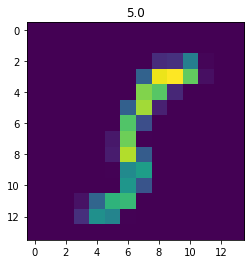

In [ ]:
a = x_train[1].reshape((14,14))
plt.title(y_train[1])
plt.imshow(a)

(d)

In [ ]:
from sklearn import svm
classifier = svm.SVC(C=1, kernel='rbf', gamma='auto')
classifier.fit(x_train/255,y_train)

SVC(C=1, gamma='auto')

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

y_predict = classifier.predict(x_val/255)

print('Validation Prediction: ',y_predict)
print('Validation Error: ',1-accuracy_score(y_predict,y_val))
print("Support Samples Percentage: ", classifier.n_support_.sum()/x_train.shape[0])
print("Confusion Matrix: ")
print(confusion_matrix(y_predict,y_val))

Validation Prediction:  [9. 2. 4. ... 9. 2. 2.]
Validation Error:  0.08499999999999996
Support Samples Percentage:  0.58325
Confusion Matrix: 
[[207   1   2   1   0   1   2   0   1   2]
 [  0 199   4   1   0   3   0   4   7   0]
 [  0   0 177   4   0   4   5   2   3   0]
 [  1   3   8 171   0   3   0   1   2   0]
 [  0   0   7   1 191   2   4   5   0   4]
 [  1   1   0   9   0 166   5   0   7   0]
 [  0   0   1   0   4   0 196   0   1   0]
 [  0   0   4   1   0   0   0 192   0   8]
 [  2   1   4   1   0   1   0   0 158   2]
 [  0   0   1   1  12   1   0   9   5 173]]


(g)

In [ ]:
from sklearn. model_selection import GridSearchCV

params = [{'C':[0.1,1,10,100,1000]}]
classifier = GridSearchCV(svm.SVC(), params, scoring='accuracy',n_jobs=-1,verbose=3)
classifier.fit(x_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid=[{'C': [0.1, 1, 10, 100, 1000]}], scoring='accuracy',
             verbose=3)

In [ ]:
classifier.best_estimator_

SVC(C=100)

In [ ]:
classifier.cv_results_

{'mean_fit_time': array([6.75766606, 2.74395604, 2.37213168, 2.37478795, 2.36837797]),
 'std_fit_time': array([0.96161968, 0.33067136, 0.03700836, 0.0356485 , 0.03027729]),
 'mean_score_time': array([2.59520488, 1.57559586, 1.34133153, 1.35084796, 1.33072052]),
 'std_score_time': array([0.03521019, 0.16161248, 0.01295878, 0.01249808, 0.02006111]),
 'param_C': masked_array(data=[0.1, 1, 10, 100, 1000],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.1}, {'C': 1}, {'C': 10}, {'C': 100}, {'C': 1000}],
 'split0_test_score': array([0.92375 , 0.960625, 0.966875, 0.964375, 0.964375]),
 'split1_test_score': array([0.93125 , 0.96125 , 0.963125, 0.966875, 0.966875]),
 'split2_test_score': array([0.92    , 0.955625, 0.96375 , 0.96375 , 0.96375 ]),
 'split3_test_score': array([0.919375, 0.9475  , 0.954375, 0.955   , 0.955   ]),
 'split4_test_score': array([0.916875, 0.946875, 0.954375, 0.95375 , 0.95375 ]),
 'mean_test

In [ ]:
classifier1 = GridSearchCV(svm.SVC(), params, scoring='accuracy',n_jobs=-1)
classifier1.fit(x_val,y_val)

GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid=[{'C': [0.1, 1, 10, 100, 1000]}], scoring='accuracy')

In [ ]:
classifier1.best_estimator_

SVC(C=10)

(h)&(j)

In [ ]:
x_small = np.empty([100,196])
y_small = np.empty([100])
x_small_val = np.empty([100,196])
y_small_val = np.empty([100])

In [ ]:
for i,j in enumerate(range(10)):
  x_small[10*i:10*(i+1),:] = x_train[random.sample(list(np.where(y_train==j)[0]),10)]
  y_small[10*i:10*(i+1)] = [j]*10
  x_small_val[10*i:10*(i+1),:] = x_val[random.sample(list(np.where(y_val==j)[0]),10)]
  y_small_val[10*i:10*(i+1)] = [j]*10

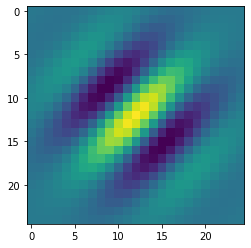

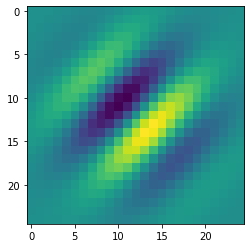

In [ ]:
from skimage.filters import gabor_kernel , gabor
import numpy as np

freq , theta , bandwidth = 0.1, np.pi/4, 1
gk = gabor_kernel(frequency=freq , theta=theta , bandwidth=bandwidth )
plt.figure(1); plt.clf (); plt.imshow(gk.real)
plt.figure(2); plt.clf (); plt.imshow(gk.imag)

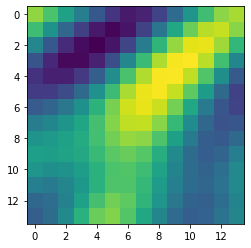

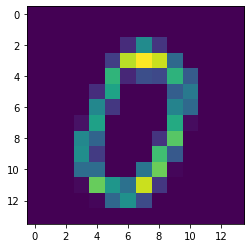

In [ ]:
# convolve the input image with the kernel and get co-efficients
# we will use only the real part and throw away the imaginary
# part of the co-efficients
image = x_ds[0].reshape((14 ,14))
coeff_real , _ = gabor(image , frequency=freq , theta=theta, bandwidth=bandwidth)
plt.figure(1); plt.clf (); plt.imshow(coeff_real)
plt.figure(2); plt.clf (); plt.imshow(image)

In [ ]:
theta = np.arange(0,np.pi,np.pi/4)
frequency = np.arange(0.05 ,0.5,0.15)
bandwidth = np.arange(0.3,1,0.3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


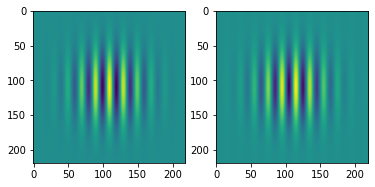

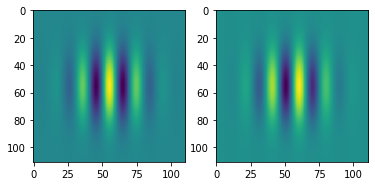

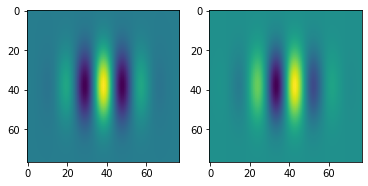

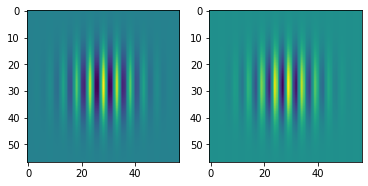

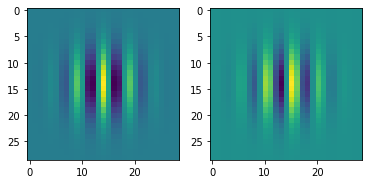

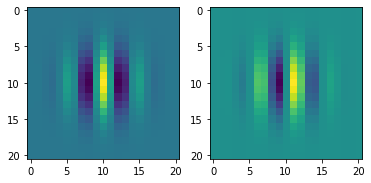

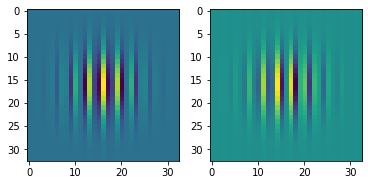

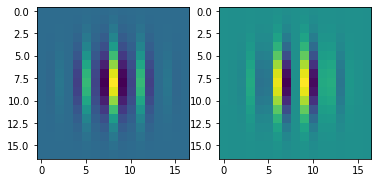

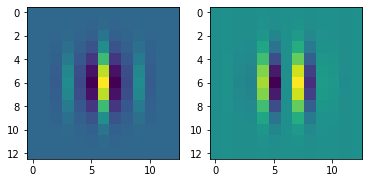

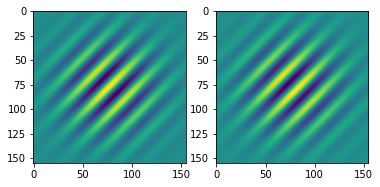

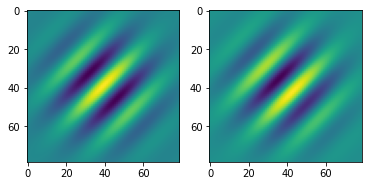

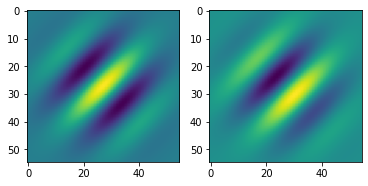

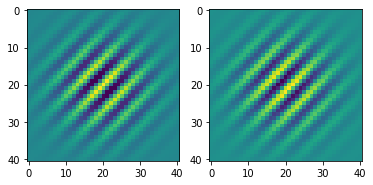

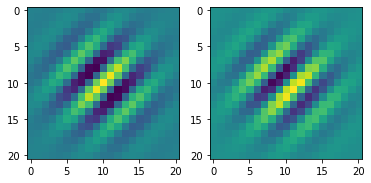

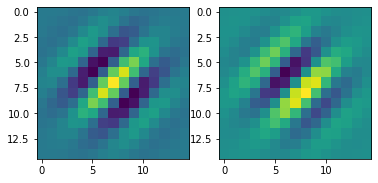

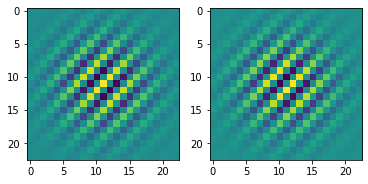

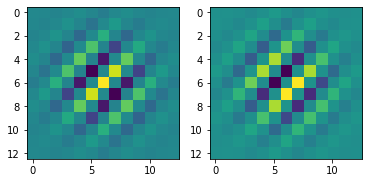

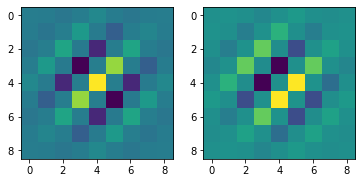

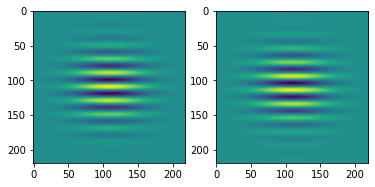

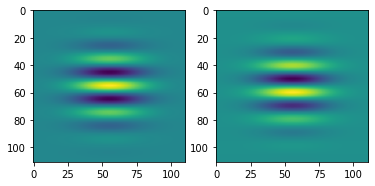

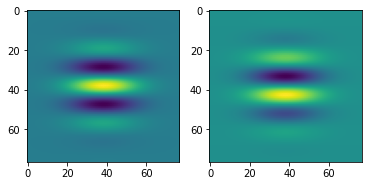

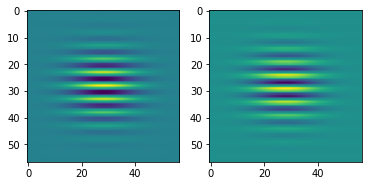

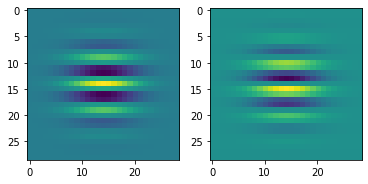

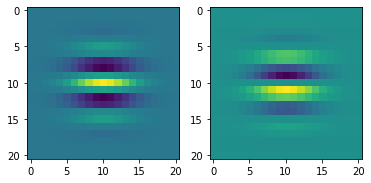

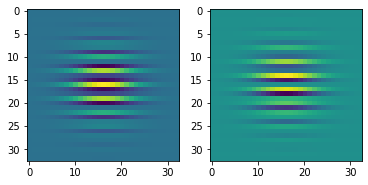

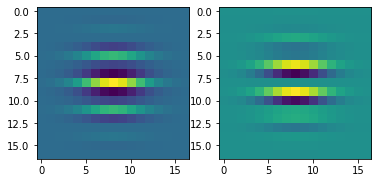

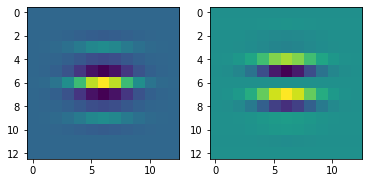

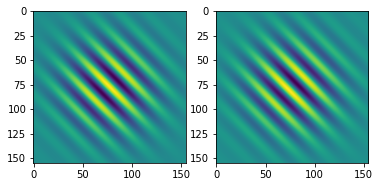

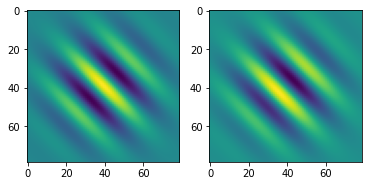

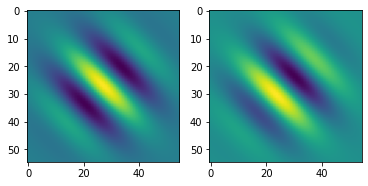

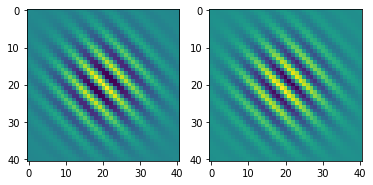

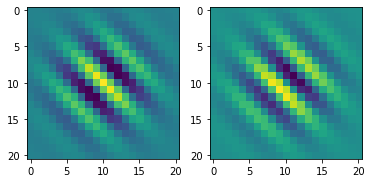

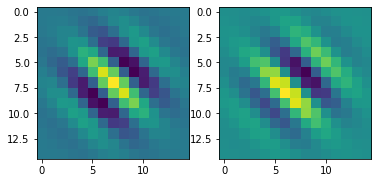

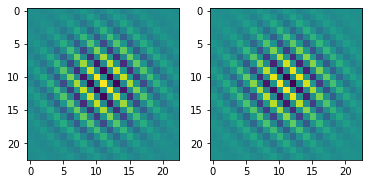

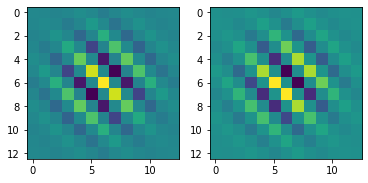

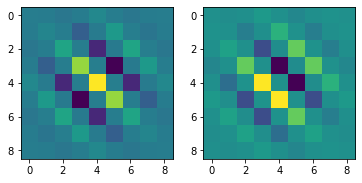

In [ ]:
i = 1
for theta_ in theta:
  for freq_ in frequency:
    for bandwidth_ in bandwidth:
      gk = gabor_kernel(frequency=freq_ , theta=theta_ , bandwidth=bandwidth_)
      fig, ax = plt.subplots(1,2)
      ax[0].imshow(gk.real)
      ax[1].imshow(gk.imag)

In [ ]:
x_gabor = np.zeros((100,len(theta)*len(frequency)*len(bandwidth)*196))
for i in range(len(x_small)):
  j = 0
  for theta_ in theta:
    for freq_ in frequency:
      for bandwidth_ in bandwidth:
        x_gabor[i,j*196:(j+1)*196] = gabor(x_small[i].reshape((14,14)), frequency=freq_, theta=theta_, bandwidth=bandwidth_)[0].flatten()
        j = j+1

In [ ]:
x_gabor_val = np.zeros((100,len(theta)*len(frequency)*len(bandwidth)*196))
for i in range(len(x_small_val)):
  j = 0
  for theta_ in theta:
    for freq_ in frequency:
      for bandwidth_ in bandwidth:
        x_gabor[i,j*196:(j+1)*196] = gabor(x_small[i].reshape((14,14)), frequency=freq_, theta=theta_, bandwidth=bandwidth_)[0].flatten()
        j = j+1

In [ ]:
classifier1 = svm.SVC(C=10, kernel='rbf', gamma='auto')
classifier1.fit(x_gabor/255,y_small)
y_train_predict = classifier1.predict(x_gabor/255)
y_val_predict = classifier1.predict(x_gabor_val/255)
print('Training Accuracy: ', accuracy_score(y_train_predict, y_small))
print('Validation Accuracy: ', accuracy_score(y_val_predict, y_small_val))

Training Accuracy:  0.86
Validation Accuracy:  0.1


PCA

In [ ]:
theta = np.arange(0,np.pi,np.pi/5)
frequency = np.arange(0.1,0.5,0.1)
bandwidth = np.arange(0.2,1,0.2)

In [ ]:
x_gabor = np.zeros((100,len(theta)*len(frequency)*len(bandwidth)*196))
for i in range(len(x_small)):
  j = 0
  for theta_ in theta:
    for freq_ in frequency:
      for bandwidth_ in bandwidth:
        x_gabor[i,j*196:(j+1)*196] = gabor(x_small[i].reshape((14,14)), frequency=freq_, theta=theta_, bandwidth=bandwidth_)[0].flatten()
        j = j+1

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=100)
pca.fit(x_gabor)

PCA(n_components=100)

In [ ]:
x_gabor_pca = pca.transform(x_gabor)

In [ ]:
x_gabor_pca.shape

(100, 100)

In [ ]:
classifier1 = svm.SVC(C=10, kernel='rbf', gamma='auto')
classifier1.fit(x_gabor_pca/255,y_small)
y_predict = classifier1.predict(x_gabor_pca/255)
print('Train Accuracy: ', accuracy_score(y_predict, y_small))

Train Accuracy:  0.94
